In [4]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [5]:
full_dataframe = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv", index_col=0, parse_dates=True)
full_dataframe

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
#                                                                    
1     7590-VHVEG  Female              0     Yes         No       1   
2     5575-GNVDE    Male              0      No         No      34   
3     3668-QPYBK    Male              0      No         No       2   
4     7795-CFOCW    Male              0      No         No      45   
5     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7039  6840-RESVB    Male              0     Yes        Yes      24   
7040  2234-XADUH  Female              0     Yes        Yes      72   
7041  4801-JZAZL  Female              0     Yes        Yes      11   
7042  8361-LTMKD    Male              1     Yes         No       4   
7043  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
#                                                                   ...   
1              No  No phone service             DSL             No  ...   
2             Yes                No             DSL            Yes  ...   
3             Yes                No             DSL            Yes  ...   
4              No  No phone service             DSL            Yes  ...   
5             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7039          Yes               Yes             DSL            Yes  ...   
7040          Yes               Yes     Fiber optic             No  ...   
7041           No  No phone service             DSL            Yes  ...   
7042          Yes               Yes     Fiber optic             No  ...   
7043          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
#                                                                               
1                  No          No          No              No  Month-to-month   
2                 Yes          No          No              No        One year   
3                  No          No          No              No  Month-to-month   
4                 Yes         Yes          No              No        One year   
5                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7039              Yes         Yes         Yes             Yes        One year   
7040              Yes          No         Yes             Yes        One year   
7041               No          No          No              No  Month-to-month   
7042               No          No          No              No  Month-to-month   
7043              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
#                                                                               
1                 Yes           Electronic check          29.85         29.85   
2                  No               Mailed check          56.95        1889.5   
3                 Yes               Mailed check          53.85        108.15   
4                  No  Bank transfer (automatic)          42.30       1840.75   
5                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7039              Yes               Mailed check          84.80        1990.5   
7040              Yes    Credit card (automatic)         103.20        7362.9   
7041              Yes           Electronic check          29.60        346.45   
7042              Yes               Mailed check          74.40         306.6   
7043              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn 

# Table Of Content

In [6]:
# 1. Data Prep
# 2. Data Analysis

# 1. Data Preparation

In [7]:
print("Data type : ", type(full_dataframe))
print("Data dims : ", full_dataframe.shape)
full_dataframe.info()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (7043, 21)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 1 to 7043
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract      

# Cleaning of Data.

In [8]:
full_dataframe.isnull().sum() # check if null

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:

# remove CID and blanks from total charges
full_dataframe=pd.DataFrame(full_dataframe.drop('customerID', axis = 1))
full_dataframe = full_dataframe[full_dataframe['TotalCharges'] != " "]
full_dataframe.dropna()
full_dataframe.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
#                                                                  
1  Female              0     Yes         No       1           No   
2    Male              0      No         No      34          Yes   
3    Male              0      No         No       2          Yes   
4    Male              0      No         No      45           No   
5  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
#                                                                 
1  No phone service             DSL             No          Yes   
2                No             DSL            Yes           No   
3                No             DSL            Yes          Yes   
4  No phone service             DSL            Yes           No   
5                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
#                                                                            
1               No          No          No              No  Month-to-month   
2              Yes          No          No              No        One year   
3               No          No          No              No  Month-to-month   
4              Yes         Yes          No              No        One year   
5               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
#                                                                            
1              Yes           Electronic check           29.85        29.85   
2               No               Mailed check           56.95       1889.5   
3              Yes               Mailed check           53.85       108.15   
4               No  Bank transfer (automatic)           42.30      1840.75   
5              Yes           Electronic check           70.70       151.65   

  Churn  
#        
1    No  
2    No  
3   Yes  
4    No  
5   Yes

In [10]:
# changing yes no into 1/0
full_dataframe["MultipleLines"].replace("No phone service","No",inplace=True)
full_dataframe["OnlineSecurity"].replace("No internet service","No",inplace=True)
full_dataframe["OnlineBackup"].replace("No internet service","No",inplace=True)
full_dataframe["DeviceProtection"].replace("No internet service","No",inplace=True)
full_dataframe["TechSupport"].replace("No internet service","No",inplace=True)
full_dataframe["StreamingTV"].replace("No internet service","No",inplace=True)
full_dataframe["StreamingMovies"].replace("No internet service","No",inplace=True)

In [11]:
full_dataframe.loc[full_dataframe["OnlineSecurity"] == "No internet service"] # check to see if it's cleaned.

Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
pd.get_dummies(full_dataframe, columns=["Partner"]).head()


gender  SeniorCitizen Dependents  tenure PhoneService MultipleLines  \
#                                                                        
1  Female              0         No       1           No            No   
2    Male              0         No      34          Yes            No   
3    Male              0         No       2          Yes            No   
4    Male              0         No      45           No            No   
5  Female              0         No       2          Yes            No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection  ...  \
#                                                               ...   
1             DSL             No          Yes               No  ...   
2             DSL            Yes           No              Yes  ...   
3             DSL            Yes          Yes               No  ...   
4             DSL            Yes           No              Yes  ...   
5     Fiber optic             No           No               No  ...   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
#                                                                
1          No              No  Month-to-month              Yes   
2          No              No        One year               No   
3          No              No  Month-to-month              Yes   
4          No              No        One year               No   
5          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn Partner_No  \
#                                                                            
1           Electronic check          29.85         29.85    No          0   
2               Mailed check          56.95        1889.5    No          1   
3               Mailed check          53.85        108.15   Yes          1   
4  Bank transfer (automatic)          42.30       1840.75    No          1   
5           Electronic check          70.70        151.65   Yes          1   

   Partner_Yes  
#               
1            1  
2            0  
3            0  
4            0  
5            0  

[5 rows x 21 columns]

In [14]:
pd.get_dummies(full_dataframe, columns=["Contract"]).head()


gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
#                                                                  
1  Female              0     Yes         No       1           No   
2    Male              0      No         No      34          Yes   
3    Male              0      No         No       2          Yes   
4    Male              0      No         No      45           No   
5  Female              0      No         No       2          Yes   

  MultipleLines InternetService OnlineSecurity OnlineBackup  ... StreamingTV  \
#                                                            ...               
1            No             DSL             No          Yes  ...          No   
2            No             DSL            Yes           No  ...          No   
3            No             DSL            Yes          Yes  ...          No   
4            No             DSL            Yes           No  ...          No   
5            No     Fiber optic             No           No  ...          No   

  StreamingMovies PaperlessBilling              PaymentMethod MonthlyCharges  \
#                                                                              
1              No              Yes           Electronic check          29.85   
2              No               No               Mailed check          56.95   
3              No              Yes               Mailed check          53.85   
4              No               No  Bank transfer (automatic)          42.30   
5              No              Yes           Electronic check          70.70   

  TotalCharges  Churn Contract_Month-to-month Contract_One year  \
#                                                                 
1        29.85     No                       1                 0   
2       1889.5     No                       0                 1   
3       108.15    Yes                       1                 0   
4      1840.75     No                       0                 1   
5       151.65    Yes                       1                 0   

   Contract_Two year  
#                     
1                  0  
2                  0  
3                  0  
4                  0  
5                  0  

[5 rows x 22 columns]

In [15]:
pd.get_dummies(full_dataframe, columns=["PaymentMethod"]).head()


gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
#                                                                  
1  Female              0     Yes         No       1           No   
2    Male              0      No         No      34          Yes   
3    Male              0      No         No       2          Yes   
4    Male              0      No         No      45           No   
5  Female              0      No         No       2          Yes   

  MultipleLines InternetService OnlineSecurity OnlineBackup  ...  \
#                                                            ...   
1            No             DSL             No          Yes  ...   
2            No             DSL            Yes           No  ...   
3            No             DSL            Yes          Yes  ...   
4            No             DSL            Yes           No  ...   
5            No     Fiber optic             No           No  ...   

  StreamingMovies        Contract PaperlessBilling MonthlyCharges  \
#                                                                   
1              No  Month-to-month              Yes          29.85   
2              No        One year               No          56.95   
3              No  Month-to-month              Yes          53.85   
4              No        One year               No          42.30   
5              No  Month-to-month              Yes          70.70   

  TotalCharges Churn  PaymentMethod_Bank transfer (automatic)  \
#                                                               
1        29.85    No                                        0   
2       1889.5    No                                        0   
3       108.15   Yes                                        0   
4      1840.75    No                                        1   
5       151.65   Yes                                        0   

  PaymentMethod_Credit card (automatic) PaymentMethod_Electronic check  \
#                                                                        
1                                     0                              1   
2                                     0                              0   
3                                     0                              0   
4                                     0                              0   
5                                     0                              1   

   PaymentMethod_Mailed check  
#                              
1                           0  
2                           1  
3                           1  
4                           0  
5                           0  

[5 rows x 23 columns]

In [16]:
from sklearn.preprocessing import LabelEncoder
colslabel =['gender','Partner','Dependents','PhoneService','PaperlessBilling','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod','Churn']
full_dataframe[colslabel] = full_dataframe[colslabel].apply(LabelEncoder().fit_transform)
print(full_dataframe)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
#                                                                        
1          0              0        1           0       1             0   
2          1              0        0           0      34             1   
3          1              0        0           0       2             1   
4          1              0        0           0      45             0   
5          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7039       1              0        1           1      24             1   
7040       0              0        1           1      72             1   
7041       0              0        1           1      11             0   
7042       1              1        1           0       4             1   
7043       1              0        0           0      66             1   

      MultipleLines  InternetService 

# Removing outliers

Q1 = Data.quantile(0.25)
Q3 = Data.quantile(0.75)
IQR = Q3 - Q1

Data_clean= Data[~((Data < (Q1 - 1.5 * IQR)) |(Data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [17]:
full_dataframe['TotalCharges'] = pd.to_numeric(full_dataframe.TotalCharges, errors='coerce') # convert TotalCharges from object to Float.

In [18]:
Data = pd.DataFrame(full_dataframe, columns=['TotalCharges'])
TotalCharges =  pd.DataFrame(full_dataframe['TotalCharges'])
Data.head()

TotalCharges
#              
1         29.85
2       1889.50
3        108.15
4       1840.75
5        151.65

In [19]:
TotalCharges.decribe()

AttributeError: 'DataFrame' object has no attribute 'decribe'

<AxesSubplot:>

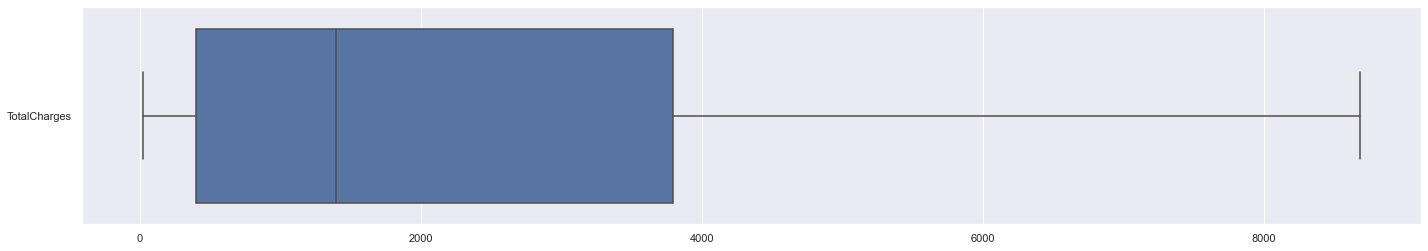

In [20]:
f = plt.figure(figsize=(24,4))
sb.boxplot(data=TotalCharges,orient = "h")

In [21]:
print("Data type : ", type(full_dataframe))
print("Data dims : ", full_dataframe.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (7032, 20)


In [22]:
# Extract only the numeric data variables
numeric_q1_data = pd.DataFrame(full_dataframe[['TotalCharges']])

# Summary Statistics for all Variables
numeric_q1_data.describe().round(2)

TotalCharges
count       7032.00
mean        2283.30
std         2266.77
min           18.80
25%          401.45
50%         1397.48
75%         3794.74
max         8684.80

In [23]:
Q1 = Data.quantile(0.25)
Q3 = Data.quantile(0.75)
IQR = Q3 - Q1
Data < (Q1 - 1.5 * IQR)
Data > (Q3 + 1.5 * IQR)

Data_clean= Data[~((Data < (Q1 - 1.5 * IQR)) |(Data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [24]:
print("Data type : ", type(Data_clean))
print("Data dims : ", Data_clean.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (7032, 1)


MonthlyCharges

In [25]:
Data = pd.DataFrame(full_dataframe, columns=['MonthlyCharges'])
MonthlyCharges =  pd.DataFrame(full_dataframe['MonthlyCharges'])
Data.head()

MonthlyCharges
#                
1           29.85
2           56.95
3           53.85
4           42.30
5           70.70

<AxesSubplot:>

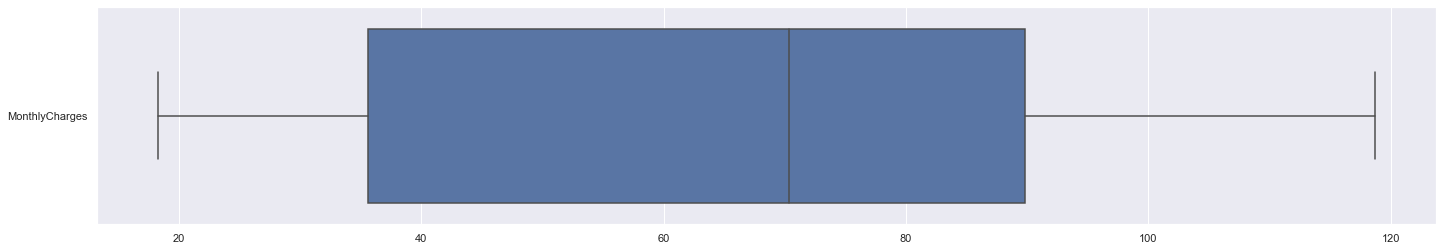

In [26]:
f = plt.figure(figsize=(24,4))
sb.boxplot(data=MonthlyCharges,orient = "h")

In [27]:
print("Data type : ", type(full_dataframe))
print("Data dims : ", full_dataframe.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (7032, 20)


In [28]:
# Extract only the numeric data variables
numeric_q1_data = pd.DataFrame(full_dataframe[['MonthlyCharges']])

# Summary Statistics for all Variables
numeric_q1_data.describe().round(2)

MonthlyCharges
count         7032.00
mean            64.80
std             30.09
min             18.25
25%             35.59
50%             70.35
75%             89.86
max            118.75

In [29]:
Q1 = Data.quantile(0.25)
Q3 = Data.quantile(0.75)
IQR = Q3 - Q1
Data < (Q1 - 1.5 * IQR)
Data > (Q3 + 1.5 * IQR)

Data_clean= Data[~((Data < (Q1 - 1.5 * IQR)) |(Data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [30]:
print("Data type : ", type(Data_clean))
print("Data dims : ", Data_clean.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (7032, 1)


Tenure

In [31]:
Data = pd.DataFrame(full_dataframe, columns=['tenure'])
tenure =  pd.DataFrame(full_dataframe['tenure'])
Data.head()

tenure
#        
1       1
2      34
3       2
4      45
5       2

<AxesSubplot:>

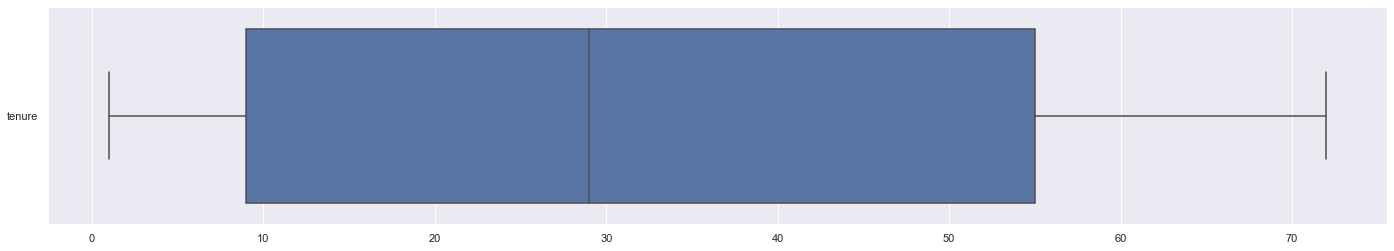

In [32]:
f = plt.figure(figsize=(24,4))
sb.boxplot(data=tenure,orient = "h")

In [70]:
pd.to_numeric(full_dataframe["tenure"])

full_dataframe['cattenure']=full_dataframe['tenure']
full_dataframe['cattenure'].loc[(full_dataframe['tenure'] > 0)&(full_dataframe['tenure'] < 20)] = "A"
full_dataframe['cattenure'].loc[(full_dataframe['tenure'] > 20)&(full_dataframe['tenure'] < 30)] = "B"
full_dataframe['cattenure'].loc[(full_dataframe['tenure'] > 30)&(full_dataframe['tenure'] < 40)] = "C"
full_dataframe['cattenure'].loc[(full_dataframe['tenure'] > 40)&(full_dataframe['tenure'] < 50)] = "D"
full_dataframe['cattenure'].loc[(full_dataframe['tenure'] > 50)&(full_dataframe['tenure'] < 60)] = "E"
full_dataframe['cattenure'].loc[(full_dataframe['tenure'] > 60)] = "F"

full_dataframe['tenure'].loc[(full_dataframe['cattenure'] == "A")]=0
full_dataframe['tenure'].loc[(full_dataframe['cattenure'] == "B")]=1
full_dataframe['tenure'].loc[(full_dataframe['cattenure'] == "C")]=2
full_dataframe['tenure'].loc[(full_dataframe['cattenure'] == "D")]=3
full_dataframe['tenure'].loc[(full_dataframe['cattenure'] == "E")]=4
full_dataframe['tenure'].loc[(full_dataframe['cattenure'] == "F")]=5
full_dataframe=pd.DataFrame(full_dataframe.drop('cattenure', axis = 1))
types = full_dataframe.dtypes
print(types)
full_dataframe.head()

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object


/Users/nicholaswong/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
#                                                                     
1       0              0        1           0       0             0   
2       1              0        0           0       2             1   
3       1              0        0           0       0             1   
4       1              0        0           0       3             0   
5       0              0        0           0       0             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
#                                                                 
1              0                0               0             1   
2              0                0               1             0   
3              0                0               1             1   
4              0                0               1             0   
5              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
#                                                                          
1                 0            0            0                0         0   
2                 1            0            0                0         1   
3                 0            0            0                0         0   
4                 1            1            0                0         1   
5                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
#                                                                        
1                 1              2           29.85         29.85      0  
2                 0              3           56.95       1889.50      0  
3                 1              3           53.85        108.15      1  
4                 0              0           42.30       1840.75      0  
5                 1              2           70.70        151.65      1

In [71]:
full_dataframe

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
#                                                                        
1          0              0        1           0       0             0   
2          1              0        0           0       2             1   
3          1              0        0           0       0             1   
4          1              0        0           0       3             0   
5          0              0        0           0       0             1   
...      ...            ...      ...         ...     ...           ...   
7039       1              0        1           1       1             1   
7040       0              0        1           1       5             1   
7041       0              0        1           1       0             0   
7042       1              1        1           0       0             1   
7043       1              0        0           0       5             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
#                                                                    
1                 0                0               0             1   
2                 0                0               1             0   
3                 0                0               1             1   
4                 0                0               1             0   
5                 0                1               0             0   
...             ...              ...             ...           ...   
7039              1                0               1             0   
7040              1                1               0             1   
7041              0                0               1             0   
7042              1                1               0             0   
7043              0                1               1             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
#                                                                             
1                    0            0            0                0         0   
2                    1            0            0                0         1   
3                    0            0            0                0         0   
4                    1            1            0                0         1   
5                    0            0            0                0         0   
...                ...          ...          ...              ...       ...   
7039                 1            1            1                1         1   
7040                 1            0            1                1         1   
7041                 0            0            0                0         0   
7042                 0            0            0                0         0   
7043                 1            1            1                1         2   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
#                                                                           
1                    1              2           29.85         29.85      0  
2                    0              3           56.95       1889.50      0  
3                    1              3           53.85        108.15      1  
4                    0              0           42.30       1840.75      0  
5                    1              2           70.70        151.65      1  
...                ...            ...             ...           ...    ...  
7039                 1              3           84.80       1990.50      0  
7040                 1              1          103.20       7362.90      0  
7041                 1              2           29.60        346.45      0  
7042                 1              3           74.40        306.60      1  
7043                 1              0          105.65       6844.50      0  

[7032 rows x 20 columns]

# Split of data

80:20

In [33]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(full_dataframe, test_size=0.2)

In [34]:
train

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
#                                                                        
1897       1              0        0           0      38             1   
276        1              0        1           0       5             1   
4032       0              0        1           0      72             1   
5955       1              0        0           0      20             0   
5629       0              0        0           0      13             1   
...      ...            ...      ...         ...     ...           ...   
1112       0              0        0           0       4             1   
1336       1              0        0           0       2             1   
389        1              0        0           0      44             1   
1951       1              0        1           0      65             1   
3668       0              1        1           1      24             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
#                                                                    
1897              1                0               1             1   
276               1                1               0             1   
4032              1                1               0             1   
5955              0                0               1             1   
5629              1                1               1             1   
...             ...              ...             ...           ...   
1112              0                1               1             0   
1336              0                0               0             0   
389               1                1               0             0   
1951              1                1               0             1   
3668              0                1               0             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
#                                                                             
1897                 1            1            0                0         0   
276                  0            1            0                0         0   
4032                 1            1            1                1         2   
5955                 1            1            1                0         0   
5629                 0            0            1                0         0   
...                ...          ...          ...              ...       ...   
1112                 1            1            0                1         0   
1336                 0            0            0                0         0   
389                  1            0            0                1         0   
1951                 0            0            1                0         0   
3668                 1            0            1                1         2   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
#                                                                           
1897                 0              2           69.95       2657.55      0  
276                  1              2           85.40        401.10      1  
4032                 1              0          110.45       7982.50      0  
5955                 1              1           55.00       1165.55      0  
5629                 1              2           96.65       1244.50      1  
...                ...            ...             ...           ...    ...  
1112                 1              0           94.40        387.20      1  
1336                 1              3           45.00         96.45      1  
389                  1              3           90.40       4063.00      0  
1951                 1              0           91.85       5940.85      1  
3668                 1              2           96.55       2263.45      0  

[5625 rows x 20 columns]

In [35]:
test

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
#                                                                        
3246       0              0        1           1      23             1   
4131       0              0        0           0      10             0   
2389       0              0        0           0       1             1   
3497       1              0        0           0      25             1   
5650       0              0        1           0      33             1   
...      ...            ...      ...         ...     ...           ...   
520        1              0        0           0      12             1   
1616       0              0        1           0      49             1   
800        1              0        0           0      62             1   
3858       1              0        0           0       5             1   
181        0              0        0           0       1             0   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
#                                                                    
3246              0                1               0             1   
4131              0                0               0             1   
2389              0                0               0             0   
3497              0                1               1             0   
5650              0                2               0             0   
...             ...              ...             ...           ...   
520               0                2               0             0   
1616              0                2               0             0   
800               1                1               0             0   
3858              0                2               0             0   
181               0                0               0             1   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
#                                                                             
3246                 1            1            0                0         0   
4131                 0            1            0                0         0   
2389                 0            0            0                1         0   
3497                 0            0            0                0         0   
5650                 0            0            0                0         0   
...                ...          ...          ...              ...       ...   
520                  0            0            0                0         0   
1616                 0            0            0                0         1   
800                  1            0            1                1         1   
3858                 0            0            0                0         0   
181                  0            0            0                0         0   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
#                                                                           
3246                 0              2           83.80       1900.25      1  
4131                 0              2           36.25        374.00      0  
2389                 1              2           55.45         55.45      0  
3497                 0              0           74.30       1952.25      0  
5650                 0              3           20.05        669.45      0  
...                ...            ...             ...           ...    ...  
520                  0              1           20.05        265.45      0  
1616                 1              0           20.05        923.10      0  
800                  1              2           96.75       6125.40      1  
3858                 0              0           20.65         93.55      0  
181                  0              0           29.95         29.95      1  

[1407 rows x 20 columns]

In [36]:
tenure = pd.DataFrame(train['tenure'])
mcharges = pd.DataFrame(train['MonthlyCharges'])
tcharges = pd.DataFrame(train['TotalCharges'])


In [37]:
train

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
#                                                                        
1897       1              0        0           0      38             1   
276        1              0        1           0       5             1   
4032       0              0        1           0      72             1   
5955       1              0        0           0      20             0   
5629       0              0        0           0      13             1   
...      ...            ...      ...         ...     ...           ...   
1112       0              0        0           0       4             1   
1336       1              0        0           0       2             1   
389        1              0        0           0      44             1   
1951       1              0        1           0      65             1   
3668       0              1        1           1      24             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
#                                                                    
1897              1                0               1             1   
276               1                1               0             1   
4032              1                1               0             1   
5955              0                0               1             1   
5629              1                1               1             1   
...             ...              ...             ...           ...   
1112              0                1               1             0   
1336              0                0               0             0   
389               1                1               0             0   
1951              1                1               0             1   
3668              0                1               0             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
#                                                                             
1897                 1            1            0                0         0   
276                  0            1            0                0         0   
4032                 1            1            1                1         2   
5955                 1            1            1                0         0   
5629                 0            0            1                0         0   
...                ...          ...          ...              ...       ...   
1112                 1            1            0                1         0   
1336                 0            0            0                0         0   
389                  1            0            0                1         0   
1951                 0            0            1                0         0   
3668                 1            0            1                1         2   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
#                                                                           
1897                 0              2           69.95       2657.55      0  
276                  1              2           85.40        401.10      1  
4032                 1              0          110.45       7982.50      0  
5955                 1              1           55.00       1165.55      0  
5629                 1              2           96.65       1244.50      1  
...                ...            ...             ...           ...    ...  
1112                 1              0           94.40        387.20      1  
1336                 1              3           45.00         96.45      1  
389                  1              3           90.40       4063.00      0  
1951                 1              0           91.85       5940.85      1  
3668                 1              2           96.55       2263.45      0  

[5625 rows x 20 columns]

TotalCharges    0.968454
dtype: float64

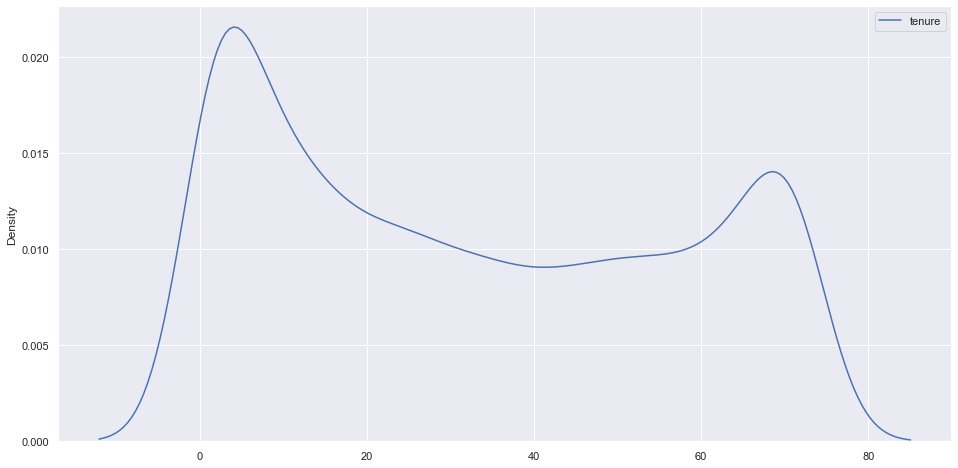

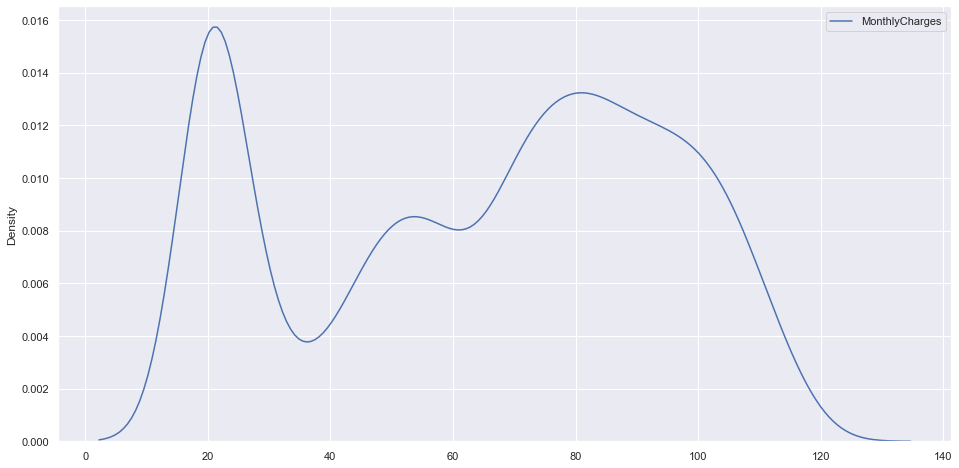

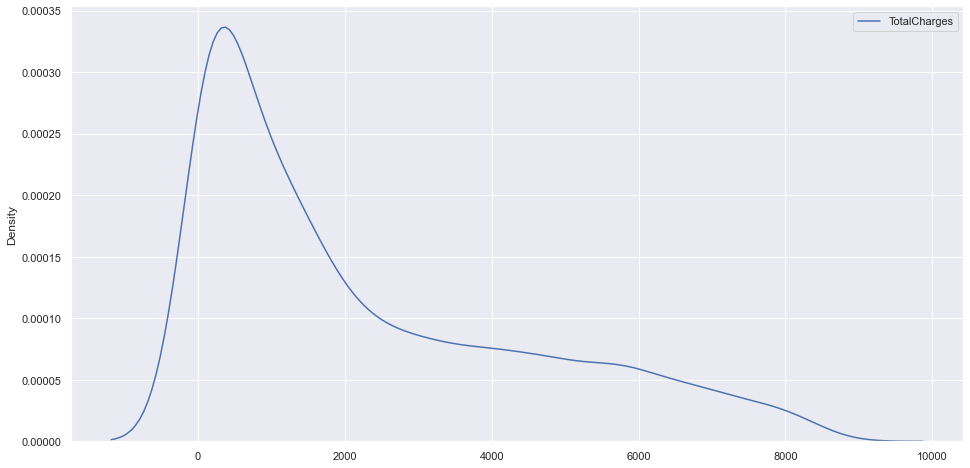

In [38]:
f = plt.figure(figsize=(16,8))
sb.kdeplot(data = tenure)

f = plt.figure(figsize=(16,8))
sb.kdeplot(data = mcharges)

f = plt.figure(figsize=(16,8))
sb.kdeplot(data = tcharges)

tenure.skew()
mcharges.skew()
tcharges.skew()

<AxesSubplot:>

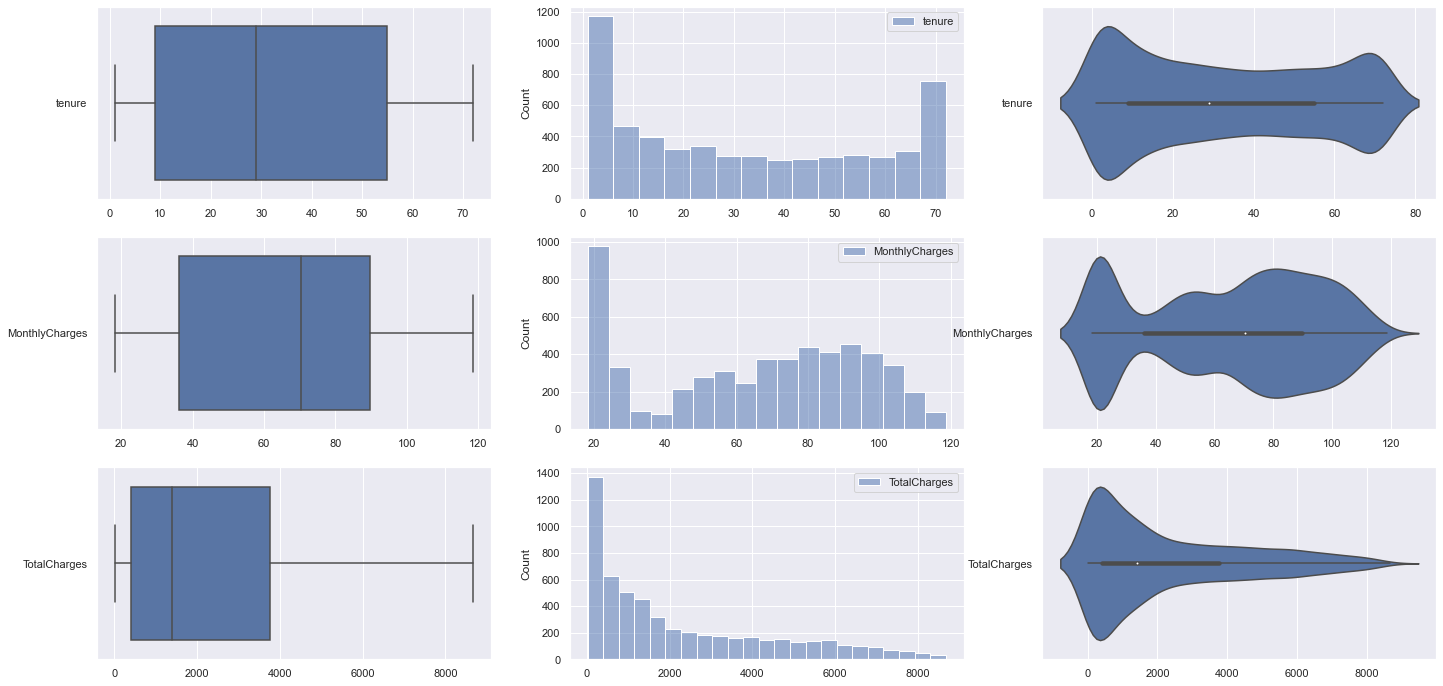

In [39]:
# Set up matplotlib figure with one subplots
f, axes = plt.subplots(3, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for jointDF
sb.boxplot(data = tenure, orient = "h", ax = axes[0,0])
sb.histplot(data = tenure, ax = axes[0,1])
sb.violinplot(data = tenure, orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for jointDF
sb.boxplot(data = mcharges, orient = "h", ax = axes[1,0])
sb.histplot(data = mcharges, ax = axes[1,1])
sb.violinplot(data = mcharges, orient = "h", ax = axes[1,2])

# Plot the basic uni-variate figures for jointDF
sb.boxplot(data = tcharges, orient = "h", ax = axes[2,0])
sb.histplot(data = tcharges, ax = axes[2,1])
sb.violinplot(data = tcharges, orient = "h", ax = axes[2,2])


In [40]:
ChurnMonthlyCharges = pd.DataFrame(train['MonthlyCharges'])
print("Data type : ", type(ChurnMonthlyCharges))
print("Data dims : ", ChurnMonthlyCharges.size)
ChurnMonthlyCharges.head()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  5625


MonthlyCharges
#                   
1897           69.95
276            85.40
4032          110.45
5955           55.00
5629           96.65

In [41]:
NoChurnMonthlyCharges = pd.DataFrame(train['MonthlyCharges'])
print("Data type : ", type(NoChurnMonthlyCharges))
print("Data dims : ", NoChurnMonthlyCharges.size)
NoChurnMonthlyCharges.head()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  5625


MonthlyCharges
#                   
1897           69.95
276            85.40
4032          110.45
5955           55.00
5629           96.65

<AxesSubplot:>

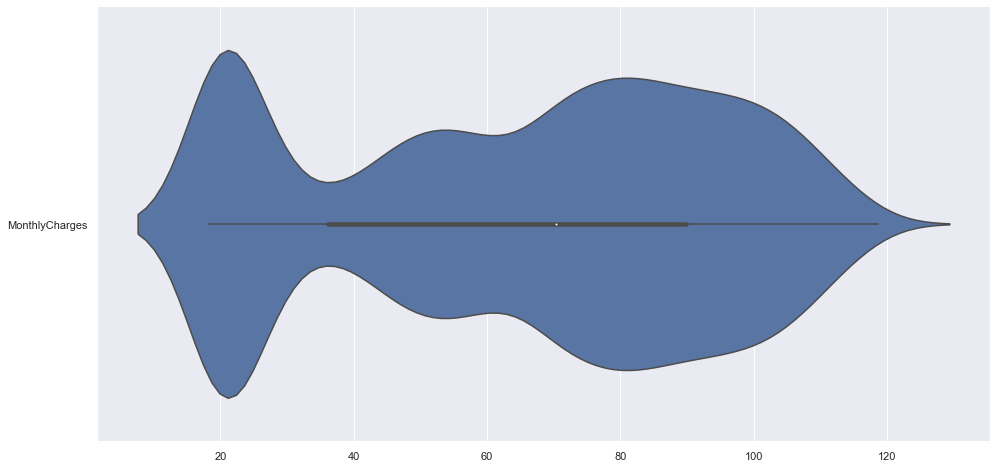

In [42]:
f = plt.figure(figsize=(16, 8))
sb.violinplot(data = ChurnMonthlyCharges, orient = "h")

In [43]:
f = plt.figure(figsize=(16, 8))
sb.violinplot(data = ChurnTotalCharges, orient = "h")

NameError: name 'ChurnTotalCharges' is not defined

<Figure size 1152x576 with 0 Axes>

# 2. Exploratory Data Analysis

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [45]:
train

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
#                                                                        
1897       1              0        0           0      38             1   
276        1              0        1           0       5             1   
4032       0              0        1           0      72             1   
5955       1              0        0           0      20             0   
5629       0              0        0           0      13             1   
...      ...            ...      ...         ...     ...           ...   
1112       0              0        0           0       4             1   
1336       1              0        0           0       2             1   
389        1              0        0           0      44             1   
1951       1              0        1           0      65             1   
3668       0              1        1           1      24             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
#                                                                    
1897              1                0               1             1   
276               1                1               0             1   
4032              1                1               0             1   
5955              0                0               1             1   
5629              1                1               1             1   
...             ...              ...             ...           ...   
1112              0                1               1             0   
1336              0                0               0             0   
389               1                1               0             0   
1951              1                1               0             1   
3668              0                1               0             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
#                                                                             
1897                 1            1            0                0         0   
276                  0            1            0                0         0   
4032                 1            1            1                1         2   
5955                 1            1            1                0         0   
5629                 0            0            1                0         0   
...                ...          ...          ...              ...       ...   
1112                 1            1            0                1         0   
1336                 0            0            0                0         0   
389                  1            0            0                1         0   
1951                 0            0            1                0         0   
3668                 1            0            1                1         2   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
#                                                                           
1897                 0              2           69.95       2657.55      0  
276                  1              2           85.40        401.10      1  
4032                 1              0          110.45       7982.50      0  
5955                 1              1           55.00       1165.55      0  
5629                 1              2           96.65       1244.50      1  
...                ...            ...             ...           ...    ...  
1112                 1              0           94.40        387.20      1  
1336                 1              3           45.00         96.45      1  
389                  1              3           90.40       4063.00      0  
1951                 1              0           91.85       5940.85      1  
3668                 1              2           96.55       2263.45      0  

[5625 rows x 20 columns]

In [46]:
train.describe()

gender  SeniorCitizen      Partner   Dependents       tenure  \
count  5625.000000    5625.000000  5625.000000  5625.000000  5625.000000   
mean      0.505244       0.160889     0.482133     0.296178    32.341511   
std       0.500017       0.367461     0.499725     0.456611    24.500388   
min       0.000000       0.000000     0.000000     0.000000     1.000000   
25%       0.000000       0.000000     0.000000     0.000000     9.000000   
50%       1.000000       0.000000     0.000000     0.000000    29.000000   
75%       1.000000       0.000000     1.000000     1.000000    55.000000   
max       1.000000       1.000000     1.000000     1.000000    72.000000   

       PhoneService  MultipleLines  InternetService  OnlineSecurity  \
count   5625.000000    5625.000000      5625.000000     5625.000000   
mean       0.903822       0.422756         0.865067        0.284978   
std        0.294861       0.494041         0.738422        0.451444   
min        0.000000       0.000000         0.000000        0.000000   
25%        1.000000       0.000000         0.000000        0.000000   
50%        1.000000       0.000000         1.000000        0.000000   
75%        1.000000       1.000000         1.000000        1.000000   
max        1.000000       1.000000         2.000000        1.000000   

       OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
count   5625.000000       5625.000000  5625.000000  5625.000000   
mean       0.345244          0.343467     0.292978     0.386311   
std        0.475490          0.474908     0.455169     0.486947   
min        0.000000          0.000000     0.000000     0.000000   
25%        0.000000          0.000000     0.000000     0.000000   
50%        0.000000          0.000000     0.000000     0.000000   
75%        1.000000          1.000000     1.000000     1.000000   
max        1.000000          1.000000     1.000000     1.000000   

       StreamingMovies     Contract  PaperlessBilling  PaymentMethod  \
count      5625.000000  5625.000000       5625.000000    5625.000000   
mean          0.390400     0.689244          0.589511       1.578311   
std           0.487883     0.832399          0.491966       1.064739   
min           0.000000     0.000000          0.000000       0.000000   
25%           0.000000     0.000000          0.000000       1.000000   
50%           0.000000     0.000000          1.000000       2.000000   
75%           1.000000     1.000000          1.000000       2.000000   
max           1.000000     2.000000          1.000000       3.000000   

       MonthlyCharges  TotalCharges        Churn  
count     5625.000000    5625.00000  5625.000000  
mean        64.814898    2273.57160     0.265778  
std         29.975320    2251.39282     0.441786  
min         18.250000      18.80000     0.000000  
25%         36.100000     412.55000     0.000000  
50%         70.300000    1400.55000     0.000000  
75%         89.800000    3770.00000     1.000000  
max        118.650000    8670.10000     1.000000

# Churn Rate

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

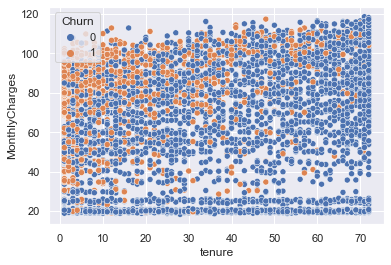

In [47]:
sns.scatterplot(data=train, x="tenure", y="MonthlyCharges", hue="Churn")

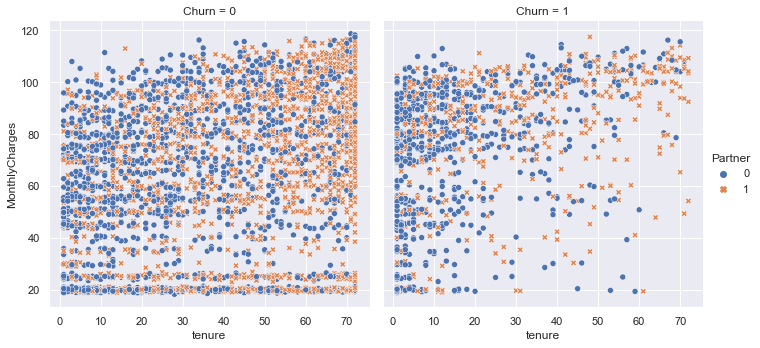

In [48]:
sns.relplot(
    data=train, x="tenure", y="MonthlyCharges",
    col="Churn", hue="Partner", style="Partner",
    kind="scatter"
)

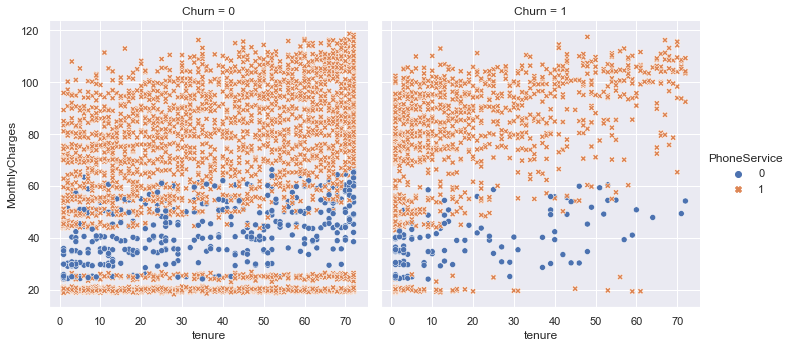

In [49]:
sns.relplot(
    data=train, x="tenure", y="MonthlyCharges",
    col="Churn", hue="PhoneService", style="PhoneService",
    kind="scatter"
)

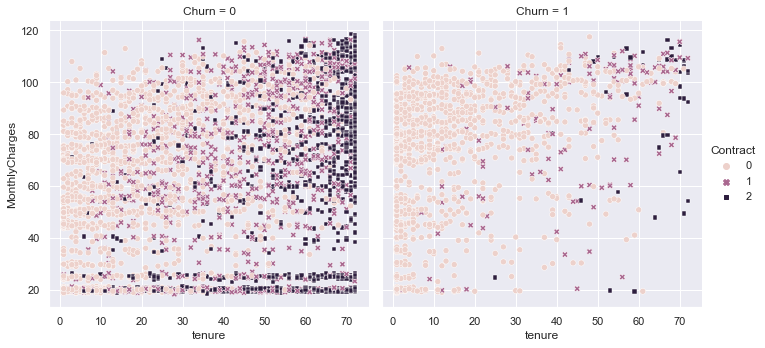

In [50]:
sns.relplot(
    data=train, x="tenure", y="MonthlyCharges",
    col="Churn", hue="Contract", style="Contract",
    kind="scatter"
)

Number of Churn : 2
0    4130
1    1495
Name: Churn, dtype: int64


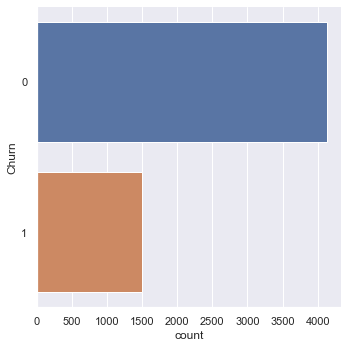

In [51]:
print("Number of Churn :", len(train["Churn"].unique()))

print(train["Churn"].value_counts())
sb.catplot(y = "Churn", data = train, kind = "count")

In [52]:
(1501/4124)*100

36.39670223084384

# Based on Tenure VS Churn, we see that cat 1 churn the most. Less than 10 years tenure, customers are not loyal - about 50% churn. A reduction of 5% churn if they move to cat 2 and 20% if they move to cat 3. At cat 8 (highest in our dataset) there is almost 0% churn rate.

Gender Distribution : 2
1    2842
0    2783
Name: gender, dtype: int64


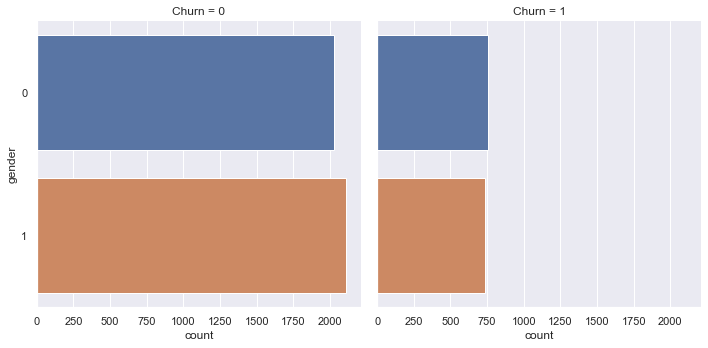

In [53]:
print("Gender Distribution :", len(train["gender"].unique()))

print(train["gender"].value_counts())
sb.catplot(y = "gender", data = train, kind = "count", col="Churn")

# Insightful knowledge that for every 100 customers, about 36 people will churn - making it about 36.4% churn rate

In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5625 entries, 1897 to 3668
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5625 non-null   int64  
 1   SeniorCitizen     5625 non-null   int64  
 2   Partner           5625 non-null   int64  
 3   Dependents        5625 non-null   int64  
 4   tenure            5625 non-null   int64  
 5   PhoneService      5625 non-null   int64  
 6   MultipleLines     5625 non-null   int64  
 7   InternetService   5625 non-null   int64  
 8   OnlineSecurity    5625 non-null   int64  
 9   OnlineBackup      5625 non-null   int64  
 10  DeviceProtection  5625 non-null   int64  
 11  TechSupport       5625 non-null   int64  
 12  StreamingTV       5625 non-null   int64  
 13  StreamingMovies   5625 non-null   int64  
 14  Contract          5625 non-null   int64  
 15  PaperlessBilling  5625 non-null   int64  
 16  PaymentMethod     5625 non-null   int64

In [55]:
# Extract only the numeric data variables
compare_numDF = pd.DataFrame(train[["Churn", "MonthlyCharges", "TotalCharges", "tenure"]])

# Summary Statistics for all Variables
compare_numDF.describe()

Churn  MonthlyCharges  TotalCharges       tenure
count  5625.000000     5625.000000    5625.00000  5625.000000
mean      0.265778       64.814898    2273.57160    32.341511
std       0.441786       29.975320    2251.39282    24.500388
min       0.000000       18.250000      18.80000     1.000000
25%       0.000000       36.100000     412.55000     9.000000
50%       0.000000       70.300000    1400.55000    29.000000
75%       1.000000       89.800000    3770.00000    55.000000
max       1.000000      118.650000    8670.10000    72.000000

In [56]:
# Calculate the complete  correlation matrix
compare_numDF.corr()

Churn  MonthlyCharges  TotalCharges    tenure
Churn           1.000000        0.201910     -0.190368 -0.344936
MonthlyCharges  0.201910        1.000000      0.647007  0.241277
TotalCharges   -0.190368        0.647007      1.000000  0.825556
tenure         -0.344936        0.241277      0.825556  1.000000

<AxesSubplot:>

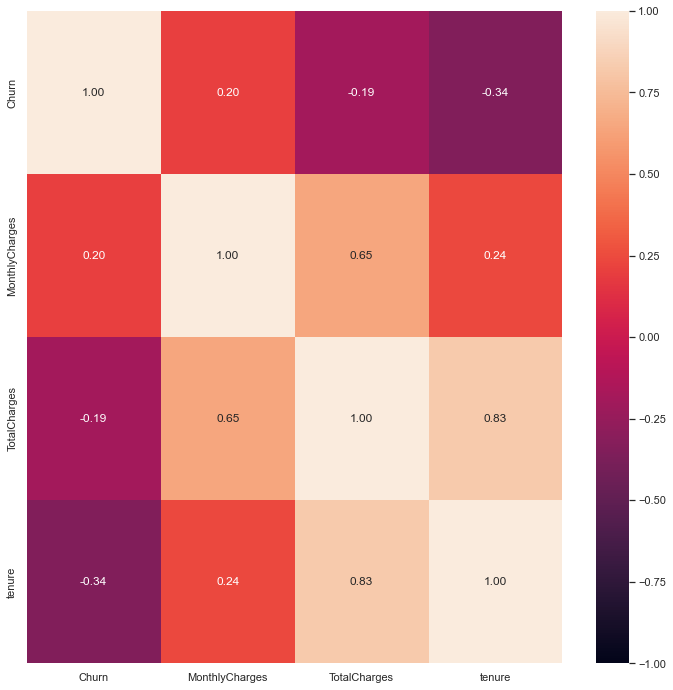

In [57]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(compare_numDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

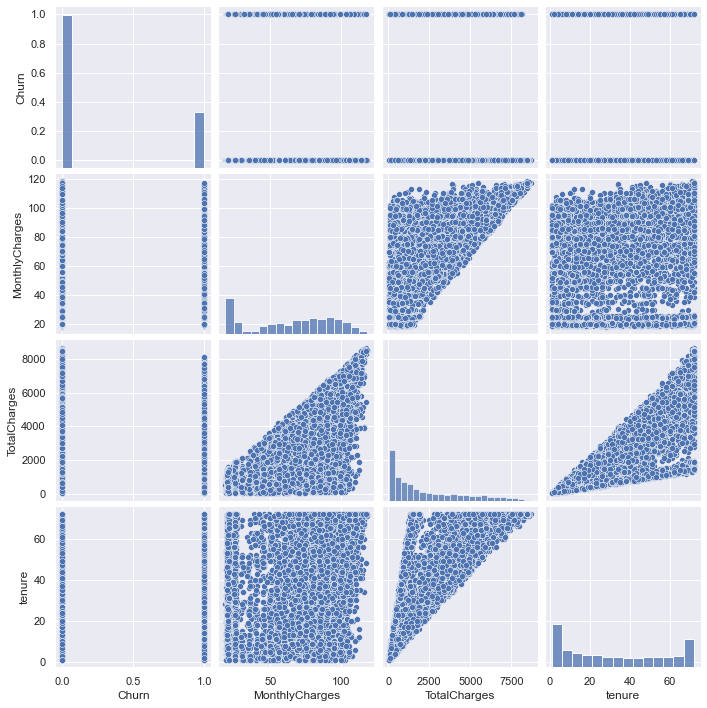

In [58]:
# Draw pairs of variables against one another
sb.pairplot(data = compare_numDF)

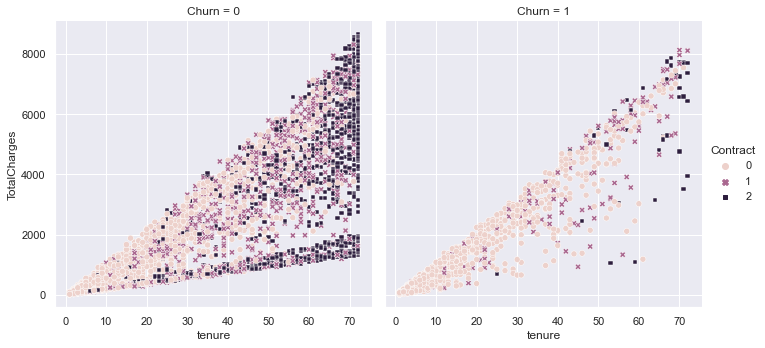

In [59]:
sns.relplot(
    data=train, x="tenure", y="TotalCharges",
    col="Churn", hue="Contract", style="Contract",
    kind="scatter"
)

In [60]:
train.loc[train["Churn"] == 1]

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
#                                                                        
276        1              0        1           0       5             1   
5629       0              0        0           0      13             1   
123        1              0        0           0       3             1   
5832       0              0        0           0       9             1   
1486       1              1        0           0      22             1   
...      ...            ...      ...         ...     ...           ...   
2439       0              0        0           0       8             1   
2816       1              0        0           0       3             1   
1112       0              0        0           0       4             1   
1336       1              0        0           0       2             1   
1951       1              0        1           0      65             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
#                                                                    
276               1                1               0             1   
5629              1                1               1             1   
123               1                1               0             0   
5832              0                1               0             0   
1486              1                1               0             0   
...             ...              ...             ...           ...   
2439              1                1               1             0   
2816              0                1               0             0   
1112              0                1               1             0   
1336              0                0               0             0   
1951              1                1               0             1   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
#                                                                             
276                  0            1            0                0         0   
5629                 0            0            1                0         0   
123                  0            0            0                0         0   
5832                 0            0            1                1         0   
1486                 0            0            1                1         0   
...                ...          ...          ...              ...       ...   
2439                 0            1            1                1         0   
2816                 1            1            1                0         0   
1112                 1            1            0                1         0   
1336                 0            0            0                0         0   
1951                 0            0            1                0         0   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
#                                                                           
276                  1              2           85.40        401.10      1  
5629                 1              2           96.65       1244.50      1  
123                  1              2           74.40        229.55      1  
5832                 1              0           90.80        809.75      1  
1486                 1              2           96.70       2082.95      1  
...                ...            ...             ...           ...    ...  
2439                 1              0          103.35        847.30      1  
2816                 1              3           88.35        262.05      1  
1112                 1              0           94.40        387.20      1  
1336                 1              3           45.00         96.45      1  
1951                 1              0           91.85       5940.85      1  

[1495 rows x 20 columns]

<AxesSubplot:>

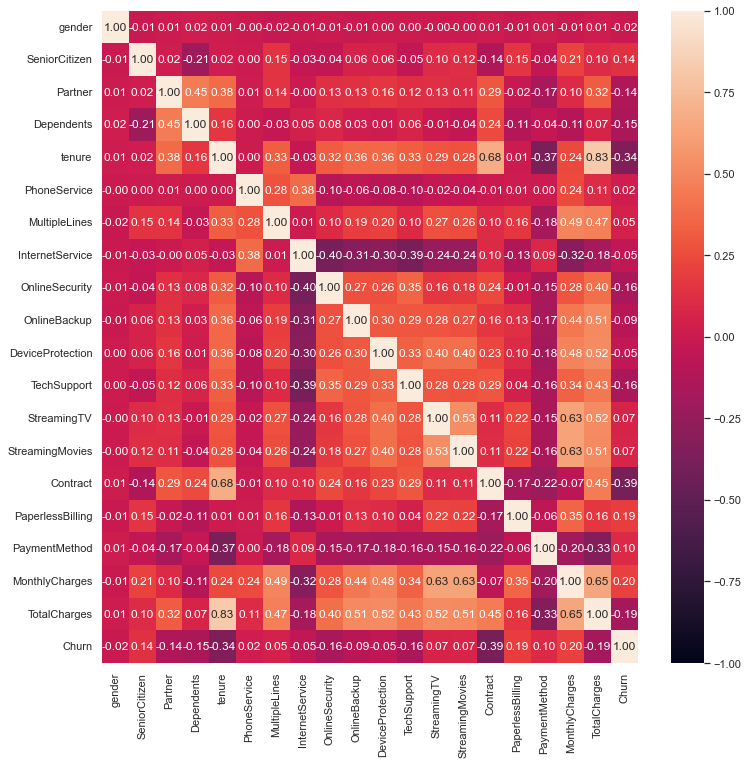

In [61]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(train.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

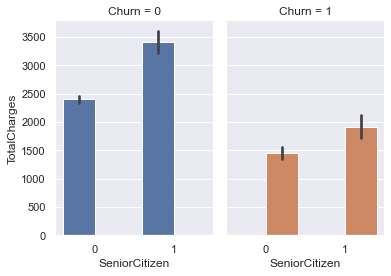

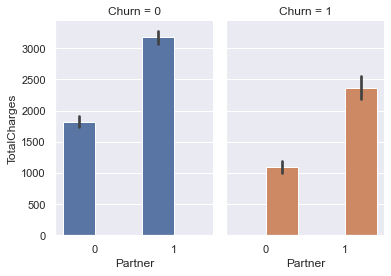

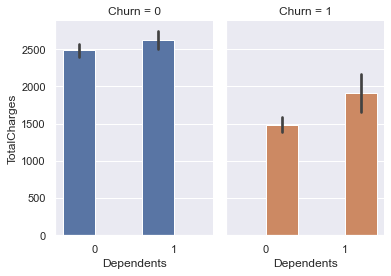

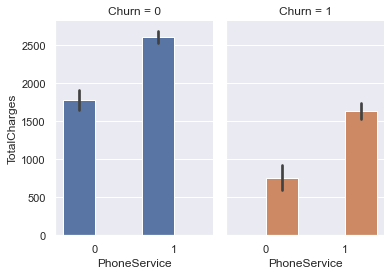

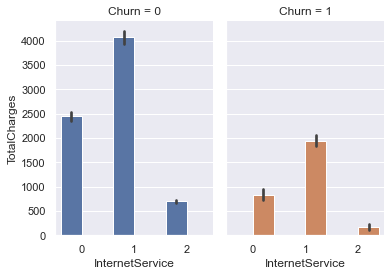

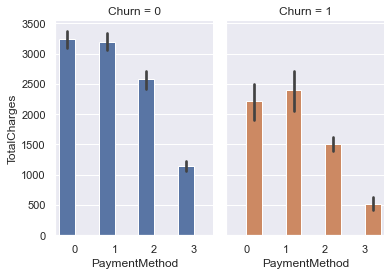

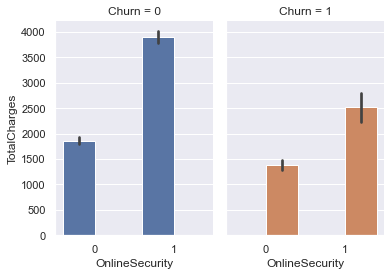

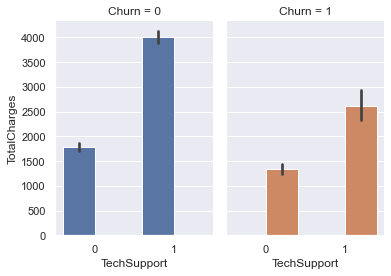

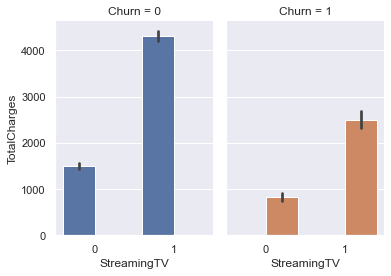

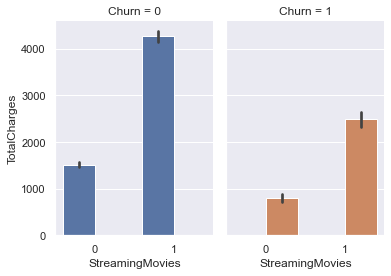

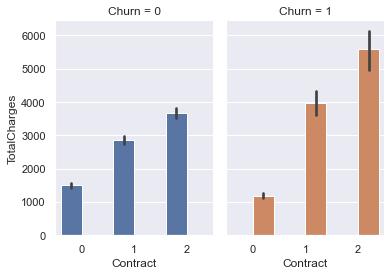

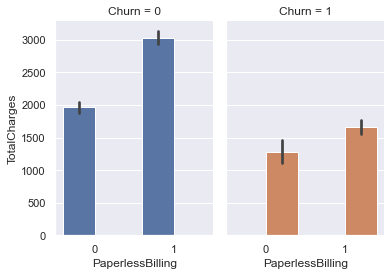

In [62]:
a = sns.catplot(x="SeniorCitizen", y="TotalCharges",
                hue="Churn", col="Churn",
                data=train, kind="bar",
                height=4, aspect=.7);
b = sns.catplot(x="Partner", y="TotalCharges",
                hue="Churn", col="Churn",
                data=train, kind="bar",
                height=4, aspect=.7);
c = sns.catplot(x="Dependents", y="TotalCharges",
                hue="Churn", col="Churn",
                data=train, kind="bar",
                height=4, aspect=.7);
d = sns.catplot(x="PhoneService", y="TotalCharges",
                hue="Churn", col="Churn",
                data=train, kind="bar",
                height=4, aspect=.7);
e = sns.catplot(x="InternetService", y="TotalCharges",
                hue="Churn", col="Churn",
                data=train, kind="bar",
                height=4, aspect=.7);
f = sns.catplot(x="PaymentMethod", y="TotalCharges",
                hue="Churn", col="Churn",
                data=train, kind="bar",
                height=4, aspect=.7);
g = sns.catplot(x="OnlineSecurity", y="TotalCharges",
                hue="Churn", col="Churn",
                data=train, kind="bar",
                height=4, aspect=.7);
h = sns.catplot(x="TechSupport", y="TotalCharges",
                hue="Churn", col="Churn",
                data=train, kind="bar",
                height=4, aspect=.7);
i = sns.catplot(x="StreamingTV", y="TotalCharges",
                hue="Churn", col="Churn",
                data=train, kind="bar",
                height=4, aspect=.7);
j = sns.catplot(x="StreamingMovies", y="TotalCharges",
                hue="Churn", col="Churn",
                data=train, kind="bar",
                height=4, aspect=.7);
k = sns.catplot(x="Contract", y="TotalCharges",
                hue="Churn", col="Churn",
                data=train, kind="bar",
                height=4, aspect=.7);
l = sns.catplot(x="PaperlessBilling", y="TotalCharges",
                hue="Churn", col="Churn",
                data=train, kind="bar",
                height=4, aspect=.7);

# If there are people not subscribed to phone what are they subscribing for?

# Majority of subscribers are with phone service. With phone service, the churn rate is about 36%. 

# If no phoneservice is the contract period shorter?

# Surprisingly, even with no phone service, the churn rate is about 33% churn rate. 

In [63]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
import plotly.express as px

In [64]:
# Histogram of Numeric across Categorical with Marginals
fig = px.histogram(train, x = "tenure", color = "Churn", marginal = "box")
fig.show()

In [65]:
# Histogram of Numeric across Categorical with Marginals
fig = px.histogram(train, x = "MonthlyCharges", color = "Churn", marginal = "box")
fig.show()

In [66]:
# Scatter Matrix for Numerics across Categorical
fig = px.scatter_matrix(train, 
                        dimensions=["tenure", "MonthlyCharges", "TotalCharges"], 
                        color = "Churn")
fig.show()

# AI Analysis

In [67]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
y = pd.DataFrame(train['Churn'])
X = pd.DataFrame(train.drop('Churn', axis = 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
rforest = RandomForestClassifier(n_estimators = 300, 
                                 max_depth = 10)       
rforest.fit(X_train, y_train.Churn.ravel())

RandomForestClassifier(max_depth=10, n_estimators=300)

Train Data
Accuracy  :	 0.9009398018796038

TPR Train :	 0.7315175097276264
TNR Train :	 0.9608112753523548

FPR Train :	 0.03918872464764524
FNR Train :	 0.26848249027237353


<AxesSubplot:>

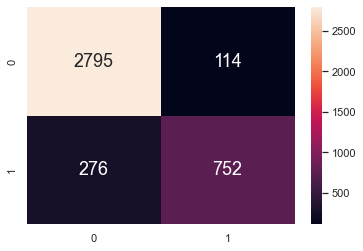

In [58]:
from sklearn.metrics import confusion_matrix
y_train_pred = rforest.predict(X_train)
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] 
fpTrain = cmTrain[0][1]
tnTrain = cmTrain[0][0]
fnTrain = cmTrain[1][0]
print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()
print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.8092417061611374

TPR Test :	 0.49195402298850577
TNR Test :	 0.9193934557063048

FPR Test :	 0.08060654429369513
FNR Test :	 0.5080459770114942


<AxesSubplot:>

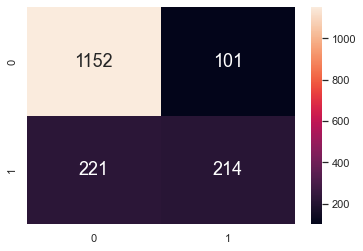

In [20]:

from sklearn.metrics import confusion_matrix
y_test_pred = rforest.predict(X_test)
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] 
fpTest = cmTest[0][1]
tnTest = cmTest[0][0]
fnTest = cmTest[1][0]
print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()
print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [ ]:
##Hyper parameter testing
from sklearn.model_selection import GridSearchCV

# Define the Hyper-parameter Grid to search on, in case of Random Forest
param_grid = {'n_estimators': np.arange(100,1001,100),   # number of trees 100, 200, ..., 1000
              'max_depth': np.arange(2, 11)}             # depth of trees 2, 3, 4, 5, ..., 10

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(RandomForestClassifier(),   # the model family
                      param_grid,                 # the search grid
                      cv = 5,                     # 5-fold cross-validation
                      scoring = 'accuracy')       # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(X_train, y_train.Churn.ravel())

In [ ]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

In [ ]:
train.corr()

# KFold Cross Validation

In [23]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [24]:
tcharge = pd.DataFrame(train['TotalCharges'])   # Response
tchurn = pd.DataFrame(train['Churn'])       # Predictor

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tcharge, tchurn, test_size = 0.20)

#  Logistic Regression

In [26]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

/Users/nicholaswong/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7191111111111111

# Support Vector Machine (SVM)

In [27]:
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

/Users/nicholaswong/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7297777777777777

# Random Forest

In [28]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

/var/folders/f1/b9jtl_x97kd8y5n9h1btlbj40000gn/T/ipykernel_7153/2692549809.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


0.6746666666666666

# KFold cross validation

In [29]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [30]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [31]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [32]:
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import load_digits
digits = load_digits()

folds = StratifiedKFold(n_splits=3)

scores_logistic = []
scores_svm = []
scores_rf = []

for train_index, test_index in folds.split(digits.data,digits.target):
    X_train, X_test, y_train, y_test = digits.data[train_index], digits.data[test_index], \
                                       digits.target[train_index], digits.target[test_index]
    scores_logistic.append(get_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, X_test, y_train, y_test))  
    scores_svm.append(get_score(SVC(gamma='auto'), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))

In [33]:
scores_logistic

[0.8948247078464107, 0.9532554257095158, 0.9098497495826378]

In [34]:
scores_svm

[0.3806343906510851, 0.41068447412353926, 0.5125208681135225]

In [35]:
scores_rf

[0.9382303839732888, 0.9449081803005008, 0.9298831385642737]

# cross_val_score function

In [36]:
from sklearn.model_selection import cross_val_score


# Logistic regression model performance using cross_val_score



In [37]:
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), digits.data, digits.target,cv=3)


array([0.89482471, 0.95325543, 0.90984975])

# svm model performance using cross_val_score

In [38]:
cross_val_score(SVC(gamma='auto'), digits.data, digits.target,cv=3)


array([0.38063439, 0.41068447, 0.51252087])

# random forest performance using cross_val_score

In [39]:
cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target,cv=3)


array([0.92153589, 0.94657763, 0.91819699])

In [40]:
scores1 = cross_val_score(RandomForestClassifier(n_estimators=5),digits.data, digits.target, cv=10)
np.average(scores1)

0.8592085661080076

In [41]:
scores2 = cross_val_score(RandomForestClassifier(n_estimators=20),digits.data, digits.target, cv=10)
np.average(scores2)

0.9360086902545003

In [42]:
scores3 = cross_val_score(RandomForestClassifier(n_estimators=30),digits.data, digits.target, cv=10)
np.average(scores3)

0.9443544382371197

In [43]:
scores4 = cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target, cv=10)
np.average(scores4)

0.9471322160148976

# We used cross_val_score to fine tune our random forest performance and 40 trees gives the best performance.